In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Bai_tap_LDS6/Time Series/candy_production.csv')
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [8]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.index = df['observation_date']
df.drop(columns = ['observation_date'], inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1972-01-01 to 2017-08-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPG3113N  548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [12]:
df.rename(columns = {'IPG113N':'volumne'}, inplace = True)

<Figure size 720x432 with 0 Axes>

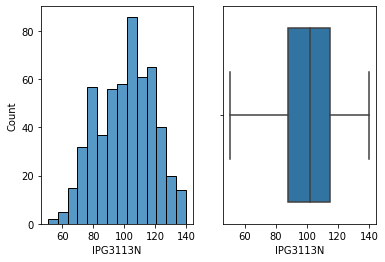

In [15]:
plt.figure(figsize = (10,6))
f,(ax1,ax2) = plt.subplots(1,2)
sns.histplot(df['IPG3113N'],ax=ax1)
sns.boxplot(df['IPG3113N'],ax=ax2)
plt.show()

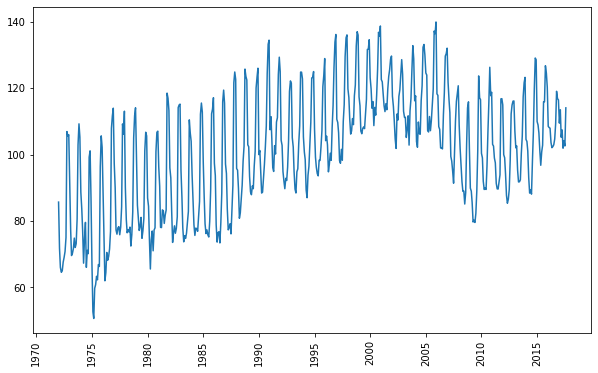

In [16]:
plt.figure(figsize = (10,6))
plt.plot(df['IPG3113N'])
plt.xticks(rotation = 90)
plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
result = seasonal_decompose(x = df, model ='multiplicative')
result

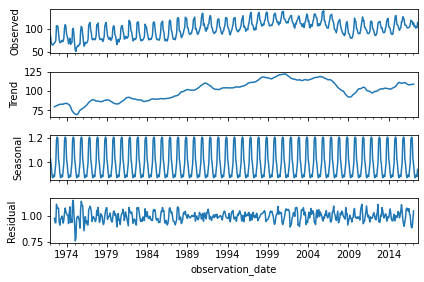

In [19]:
result.plot()
plt.show()

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
df.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01'],
              dtype='datetime64[ns]', name='observation_date', length=548, freq=None)

In [23]:
train = df.loc['1972-01-01':'2004-02-01']
test = df.loc['2004-02-01':]

In [25]:
model = ExponentialSmoothing(train, seasonal = 'mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [26]:
pred = model.predict(start = test.index[0], end = test.index[-1])

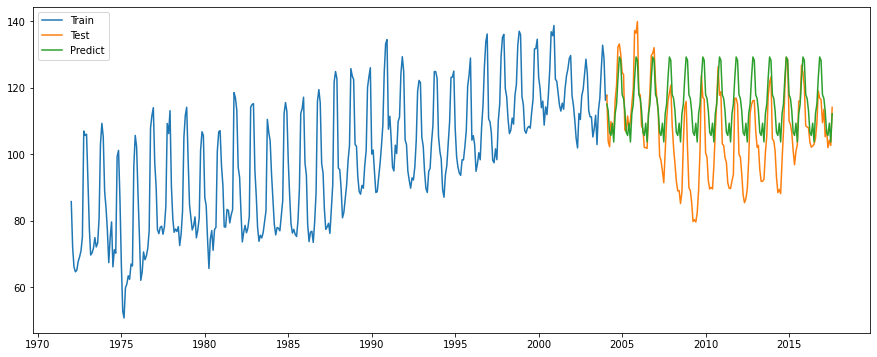

In [27]:
plt.figure(figsize = (15,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict')
plt.legend()
plt.show()

In [28]:
import datetime
s = datetime.datetime(2017,9,1)
e = datetime.datetime(2017,12,1)
pred_3_month = model.predict(start = s, end = e)
pred_3_month

2017-09-01    115.052663
2017-10-01    122.812489
2017-11-01    129.224717
2017-12-01    128.232468
Freq: MS, dtype: float64

In [29]:
x = pd.Series(pred_3_month)

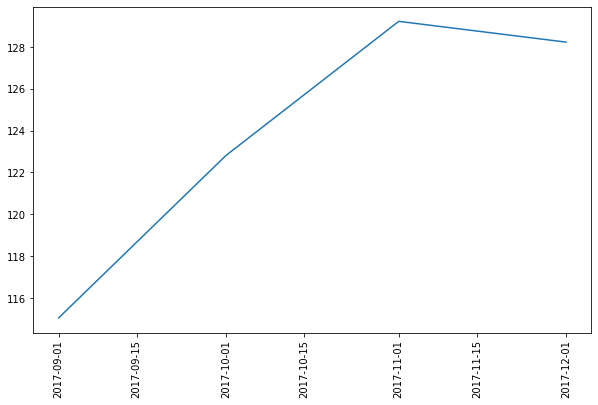

In [30]:
plt.figure(figsize = (10,6))
plt.plot(x.index,x.values, label = 'Predict 3 month')
plt.xticks(rotation = 90)
plt.show()

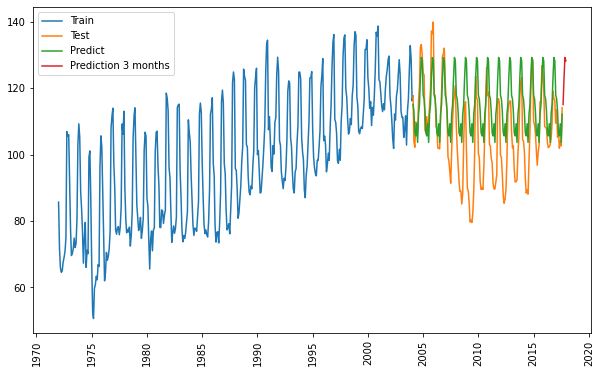

In [31]:
plt.figure (figsize = (10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict')
plt.plot(x.index, x.values, label = 'Prediction 3 months')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [32]:
import datetime
s = datetime.datetime(2017,9,1)
e = datetime.datetime(2020,12,1)
pred = model.predict(start = s, end = e)
pred

2017-09-01    115.052663
2017-10-01    122.812489
2017-11-01    129.224717
2017-12-01    128.232468
2018-01-01    117.885439
2018-02-01    116.704846
2018-03-01    113.096622
2018-04-01    106.532653
2018-05-01    105.612471
2018-06-01    109.291445
2018-07-01    103.657109
2018-08-01    112.136263
2018-09-01    115.052663
2018-10-01    122.812489
2018-11-01    129.224717
2018-12-01    128.232468
2019-01-01    117.885439
2019-02-01    116.704846
2019-03-01    113.096622
2019-04-01    106.532653
2019-05-01    105.612471
2019-06-01    109.291445
2019-07-01    103.657109
2019-08-01    112.136263
2019-09-01    115.052663
2019-10-01    122.812489
2019-11-01    129.224717
2019-12-01    128.232468
2020-01-01    117.885439
2020-02-01    116.704846
2020-03-01    113.096622
2020-04-01    106.532653
2020-05-01    105.612471
2020-06-01    109.291445
2020-07-01    103.657109
2020-08-01    112.136263
2020-09-01    115.052663
2020-10-01    122.812489
2020-11-01    129.224717
2020-12-01    128.232468


In [33]:
x = pd.Series(pred)

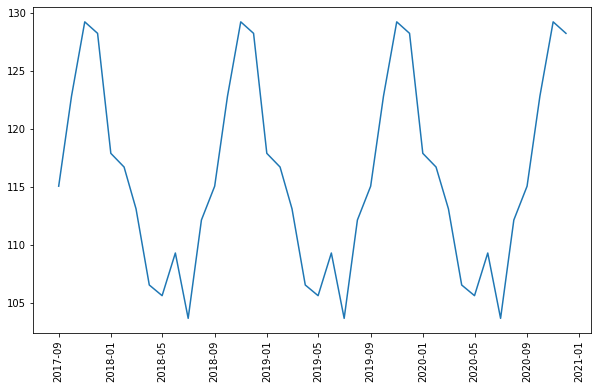

In [34]:
plt.figure(figsize = (10,6))
plt.plot(x.index,x.values, label = 'Prediction')
plt.xticks(rotation = 90)
plt.show()

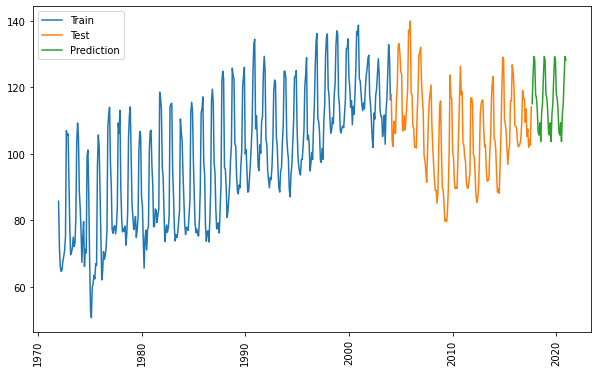

In [35]:
plt.figure (figsize = (10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(x.index, x.values, label = 'Prediction')
plt.legend()
plt.xticks(rotation = 90)
plt.show()